In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import random
import keras

Using TensorFlow backend.


In [3]:
from keras import layers, optimizers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# Loading test and train datasets

In [6]:
X = np.loadtxt('data_1000.csv', delimiter = ',').reshape(1000, 32, 32, 3)
Y = np.loadtxt('label_1000.csv', delimiter = ',').reshape(X.shape[0],1)

X_t = np.loadtxt('test_data.csv', delimiter = ',').reshape(X_t.shape[0], 32, 32, 3)
Y_t = np.loadtxt('test_label.csv', delimiter = ',').reshape(X_t.shape[0],1)

In [7]:
print(X.shape, Y.shape, X_t.shape, Y_t.shape)

(1000, 32, 32, 3) (1000, 1) (300, 32, 32, 3) (300, 1)


# Model

In [8]:
def model(input_shape):
    X_input = Input(input_shape)
    #X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(64, (3,3), strides = (1,1), name = 'conv0')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name = 'maxpool0')(X)
    
    X = Conv2D(32, (3,3), strides = (1,1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name = 'maxpool1')(X)
    
    X = Conv2D(16, (3,3), strides = (1,1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name = 'maxpool2')(X)
    
    X = Flatten()(X)
    X = Dense(1, activation = 'sigmoid', name = 'fc')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'model')
    
    return model

# Calling model - From here it starts learning

In [9]:
obj_model = model(X.shape[1:])

#  Calling optimizer, loss

In [10]:
sgd = optimizers.SGD(lr = 0.1, momentum= 0, decay = 0)
adam = optimizers.adam(lr = 0.001)
obj_model.compile(optimizer = adam, loss = 'mean_squared_error', metrics = ['accuracy'])

In [11]:
object_model = obj_model.fit(x = X, y = Y, epochs = 5, batch_size = 64)

Epoch 1/5
1000/1000 [==============================] - 23s 23ms/step - loss: 0.2115 - acc: 0.6700
Epoch 2/5
1000/1000 [==============================] - 22s 22ms/step - loss: 0.1608 - acc: 0.7740
Epoch 3/5
1000/1000 [==============================] - 22s 22ms/step - loss: 0.1370 - acc: 0.8360
Epoch 4/5
1000/1000 [==============================] - 22s 22ms/step - loss: 0.1119 - acc: 0.8650
Epoch 5/5
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0942 - acc: 0.9070


# Plottting Model

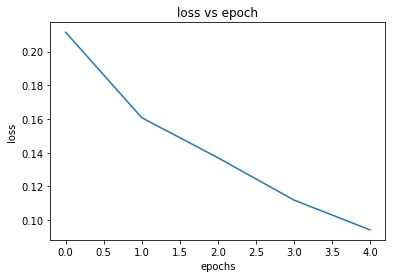

In [12]:
plt.plot(object_model.history['loss'])
plt.title('loss vs epoch')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Test accuracy

In [13]:
preds = obj_model.evaluate(x = X_t, y = Y_t)
t_acc = preds[1]*100
print("Our test accuracy is %.2f" %t_acc)

300/300 [==============================] - 3s 9ms/step
Our test accuracy is 75.33


# Testing your own image

[[ True]]


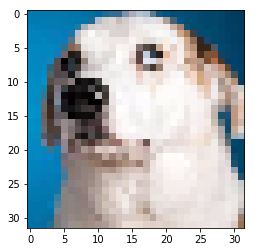

In [232]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

img_path = 'dog1.jpg'
img = image.load_img(img_path, target_size=(32,32))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y_prob = obj_model.predict(x)
y_classes = y_prob > 0.5
print(y_classes)         # False = bird, True = dog

# Conclusion:
- Adam is working really well, becoz of high learning speed and better accuracy
- Increasing the number of filter size results in better test as well as train performance.
- Gradually decreasing the number of filters works really well in performance of test set.
- Convolutional Neural Network (with Adam) is much faster than logistic regression and thus much faster than NN.